**TEXT FOR SUBMISSION**

Prediction question: How many write-in votes are going to be cast per county in the upcoming 2024 presidential election, and how does this vary across office titles?

In elections in the past, counties with high write-in voting rates have experienced delays in reporting their results due to the fact that write-in votes often require manual verification, making them more time-consuming and labor-intensive to count.

By predicting number of write-in votes per county in the 2024 presidential election, then officals in the election can be aware of areas with highwrite in votes ahead of time. This can help to ensure both timely and accurate election results, which is crucial for keeping public trust in the eletion process.    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [ ]:
results = pd.read_csv('Results.csv')
results.head()

,CandidateId,CandidateName,TOTAL_VOTES,Party,WriteInVote,LocalityCode,LocalityName,PrecinctId,PrecinctName,DistrictId,DistrictType,DistrictName,OfficeId,OfficeTitle,ElectionId,ElectionType,ElectionDate,ElectionName,NumberOfSeats
0,cs1565,Cedrick L. Cooper,428,NaN,0,1,ACCOMACK COUNTY,0101,101 - CHINCOTEAGUE,ed5958,county,ACCOMACK COUNTY,cc956,Clerk of Court (Accomack County),NaN,General,2023-11-07,2023 November General and Special Elections,1
1,cs2354,Charlena Jones,379,Democratic,0,1,ACCOMACK COUNTY,0101,101 - CHINCOTEAGUE,ed6085,state-house,100,cc1480,"Member, House of Delegates (100th District)",NaN,General,2023-11-07,2023 November General and Special Elections,1
2,cs2484,Connie C. Burford,529,NaN,0,1,ACCOMACK COUNTY,0101,101 - CHINCOTEAGUE,ed6755,other,DISTRICT 1,cc1566,Member School Board (District 1),NaN,General,2023-11-07,2023 November General and Special Elections,1
3,cs2181,"J. Spencer Morgan, III",1067,NaN,0,1,ACCOMACK COUNTY,0101,101 - CHINCOTEAGUE,ed5958,county,ACCOMACK COUNTY,cc1368,Commonwealth's Attorney (Accomack County),NaN,General,2023-11-07,2023 November General and Special Elections,1
4,cs1438,"James A. Lilliston, Sr.",1097,NaN,0,1,ACCOMACK COUNTY,0101,101 - CHINCOTEAGUE,ed5958,county,ACCOMACK COUNTY,cc888,Treasurer (Accomack County),NaN,General,2023-11-07,2023 November General and Special Elections,1


In [ ]:
turnout = pd.read_csv('Turnout.csv')
turnout.head()

,election,election_date,locality,precinct,Early Voting,Provisional,Election Day,Mailed Absentee,Post-Election,TotalVoteTurnout,ActiveRegisteredVoters,InactiveRegisteredVoters,TotalRegisteredVoters
0,2023 November General and Special Elections,11/07/2023 00:00:00,ACCOMACK COUNTY,101 - CHINCOTEAGUE,157.0,3.0,1035.0,110.0,10.0,1315.0,2788.0,206.0,2994.0
1,2023 November General and Special Elections,11/07/2023 00:00:00,ACCOMACK COUNTY,201 - ATLANTIC,79.0,3.0,371.0,14.0,3.0,470.0,949.0,50.0,999.0
2,2023 November General and Special Elections,11/07/2023 00:00:00,ACCOMACK COUNTY,202 - GREENBACKVILLE,96.0,5.0,627.0,57.0,6.0,791.0,1749.0,163.0,1912.0
3,2023 November General and Special Elections,11/07/2023 00:00:00,ACCOMACK COUNTY,301 - NEW CHURCH,260.0,8.0,537.0,109.0,6.0,920.0,2678.0,190.0,2868.0
4,2023 November General and Special Elections,11/07/2023 00:00:00,ACCOMACK COUNTY,401 - BLOXOM,66.0,NaN,350.0,14.0,1.0,431.0,1109.0,64.0,1173.0


In [ ]:
winners = pd.read_csv('Winners.csv')
winners.head()

,Locality,District,Office,PoliticalParty,BallotName,Seats,CandidateId
0,NaN,001,"Member, House of Delegates (1st District)",Democratic,Patrick A. Hope,1,cs1893
1,NaN,001,"Member, Senate of Virginia (1st District)",Republican,Timmy F. French,1,cs1351
2,NaN,002,"Member, House of Delegates (2nd District)",Democratic,Adele Y. McClure,1,cs181
3,NaN,002,"Member, Senate of Virginia (2nd District)",Republican,Mark D. Obenshain,1,cs1483
4,NaN,003,"Member, House of Delegates (3rd District)",Democratic,Alfonso H. Lopez,1,cs207


In [ ]:
print(results.shape)
print(turnout.shape)
print(winners.shape)

(66269, 19)
(2675, 13)
(1799, 7)


In [ ]:
results.columns

Index(['CandidateId', 'CandidateName', 'TOTAL_VOTES', 'Party', 'WriteInVote',
       'LocalityCode', 'LocalityName', 'PrecinctId', 'PrecinctName',
       'DistrictId', 'DistrictType', 'DistrictName', 'OfficeId', 'OfficeTitle',
       'ElectionId', 'ElectionType', 'ElectionDate', 'ElectionName',
       'NumberOfSeats'],
      dtype='object')

In [ ]:
turnout.columns

Index(['election', 'election_date', 'locality', 'precinct', 'Early Voting',
       'Provisional', 'Election Day', 'Mailed Absentee', 'Post-Election',
       'TotalVoteTurnout', 'ActiveRegisteredVoters',
       'InactiveRegisteredVoters', 'TotalRegisteredVoters'],
      dtype='object')

In [ ]:
winners.columns

Index(['Locality', 'District', 'Office', 'PoliticalParty', 'BallotName',
       'Seats', 'CandidateId'],
      dtype='object')

In [ ]:
#merge results and winners dataframes
merged_results_winners = pd.merge(results, winners, on='CandidateId', how='left')
merged_results_winners.head()

,CandidateId,CandidateName,TOTAL_VOTES,Party,WriteInVote,LocalityCode,LocalityName,PrecinctId,PrecinctName,DistrictId,...,ElectionType,ElectionDate,ElectionName,NumberOfSeats,Locality,District,Office,PoliticalParty,BallotName,Seats
0,cs1565,Cedrick L. Cooper,428,NaN,0,1,ACCOMACK COUNTY,0101,101 - CHINCOTEAGUE,ed5958,...,General,2023-11-07,2023 November General and Special Elections,1,NaN,NaN,NaN,NaN,NaN,NaN
1,cs2354,Charlena Jones,379,Democratic,0,1,ACCOMACK COUNTY,0101,101 - CHINCOTEAGUE,ed6085,...,General,2023-11-07,2023 November General and Special Elections,1,NaN,NaN,NaN,NaN,NaN,NaN
2,cs2484,Connie C. Burford,529,NaN,0,1,ACCOMACK COUNTY,0101,101 - CHINCOTEAGUE,ed6755,...,General,2023-11-07,2023 November General and Special Elections,1,NaN,NaN,NaN,NaN,NaN,NaN
3,cs2181,"J. Spencer Morgan, III",1067,NaN,0,1,ACCOMACK COUNTY,0101,101 - CHINCOTEAGUE,ed5958,...,General,2023-11-07,2023 November General and Special Elections,1,ACCOMACK COUNTY,ACCOMACK COUNTY,Commonwealth's Attorney (Accomack County),NaN,"J. Spencer Morgan, III",1.0
4,cs1438,"James A. Lilliston, Sr.",1097,NaN,0,1,ACCOMACK COUNTY,0101,101 - CHINCOTEAGUE,ed5958,...,General,2023-11-07,2023 November General and Special Elections,1,ACCOMACK COUNTY,ACCOMACK COUNTY,Treasurer (Accomack County),NaN,"James A. Lilliston, Sr.",1.0


In [ ]:
merged_results_winners.columns

Index(['CandidateId', 'CandidateName', 'TOTAL_VOTES', 'Party', 'WriteInVote',
       'LocalityCode', 'LocalityName', 'PrecinctId', 'PrecinctName',
       'DistrictId', 'DistrictType', 'DistrictName', 'OfficeId', 'OfficeTitle',
       'ElectionId', 'ElectionType', 'ElectionDate', 'ElectionName',
       'NumberOfSeats', 'Locality', 'District', 'Office', 'PoliticalParty',
       'BallotName', 'Seats'],
      dtype='object')

In [ ]:
unique_parties = merged_results_winners['Party'].unique()
print(unique_parties)

[nan 'Democratic' 'Republican' 'Independent' 'Libertarian']


In [ ]:
#convert parties from strings to floats for analysis
string_to_float = {
    np.nan: 0,
    'Democratic': 1,
    'Republican': 2,
    'Independent': 3,
    'Libertarian': 4
}

merged_results_winners['Party_Float'] = (
    merged_results_winners['Party']
    .map(string_to_float)
    .fillna(0)
)

print(merged_results_winners[['Party', 'Party_Float']].head())

        Party  Party_Float
0         NaN            0
1  Democratic            1
2         NaN            0
3         NaN            0
4         NaN            0


In [ ]:
merged_results_winners.columns

Index(['CandidateId', 'CandidateName', 'TOTAL_VOTES', 'Party', 'WriteInVote',
       'LocalityCode', 'LocalityName', 'PrecinctId', 'PrecinctName',
       'DistrictId', 'DistrictType', 'DistrictName', 'OfficeId', 'OfficeTitle',
       'ElectionId', 'ElectionType', 'ElectionDate', 'ElectionName',
       'NumberOfSeats', 'Locality', 'District', 'Office', 'PoliticalParty',
       'BallotName', 'Seats', 'Party_Float'],
      dtype='object')

**Key Results Introduction**

The main aim of our analysis was to predict number of write-in votes by localtiy for the 2024 presidental election. However, our regression model faced some challanges in reaching a strong predictive preformance due to the significant class imbalance along with a handful of other issues. Our results, which include mean, R^2, and mean squared errors (MSE), give us a better understanding of these challanges.

In [ ]:
X = merged_results_winners[['Party_Float', 'LocalityCode']]
y = merged_results_winners['WriteInVote']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [ ]:
locality_group = merged_results_winners.groupby('LocalityCode')

locality_predictions = locality_group['WriteInVote'].mean()
print(locality_predictions)

LocalityCode
1        1.191667
3        6.266871
5        0.947522
7        2.493671
9        5.837696
          ...    
800      2.416928
810      5.901722
820    102.755556
830     10.090909
840      7.337662
Name: WriteInVote, Length: 133, dtype: float64


These are the mean number of write in votes per locality.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 677.4810505305412
R² Score: 0.008893355530268043


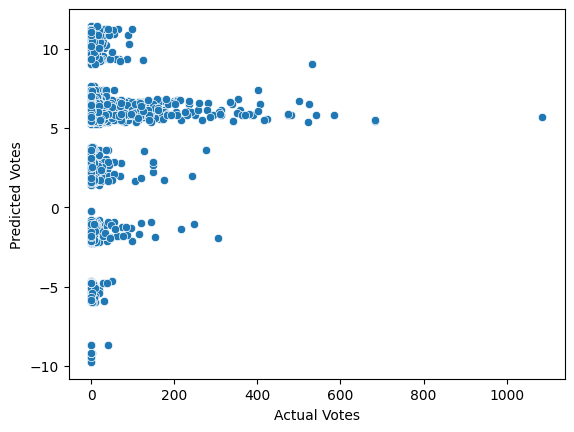

In [ ]:
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel("Actual Votes")
plt.ylabel("Predicted Votes")
plt.show()



In [ ]:
# prompt: write a code for the number of write in votes per locality

# Assuming 'merged_results_winners' DataFrame is already created as in your provided code.

locality_writein_counts = merged_results_winners.groupby('LocalityCode')['WriteInVote'].sum()
locality_writein_counts

,WriteInVote
LocalityCode,
1,572
3,4086
5,325
7,394
9,2230
...,...
800,771
810,5825
820,4624


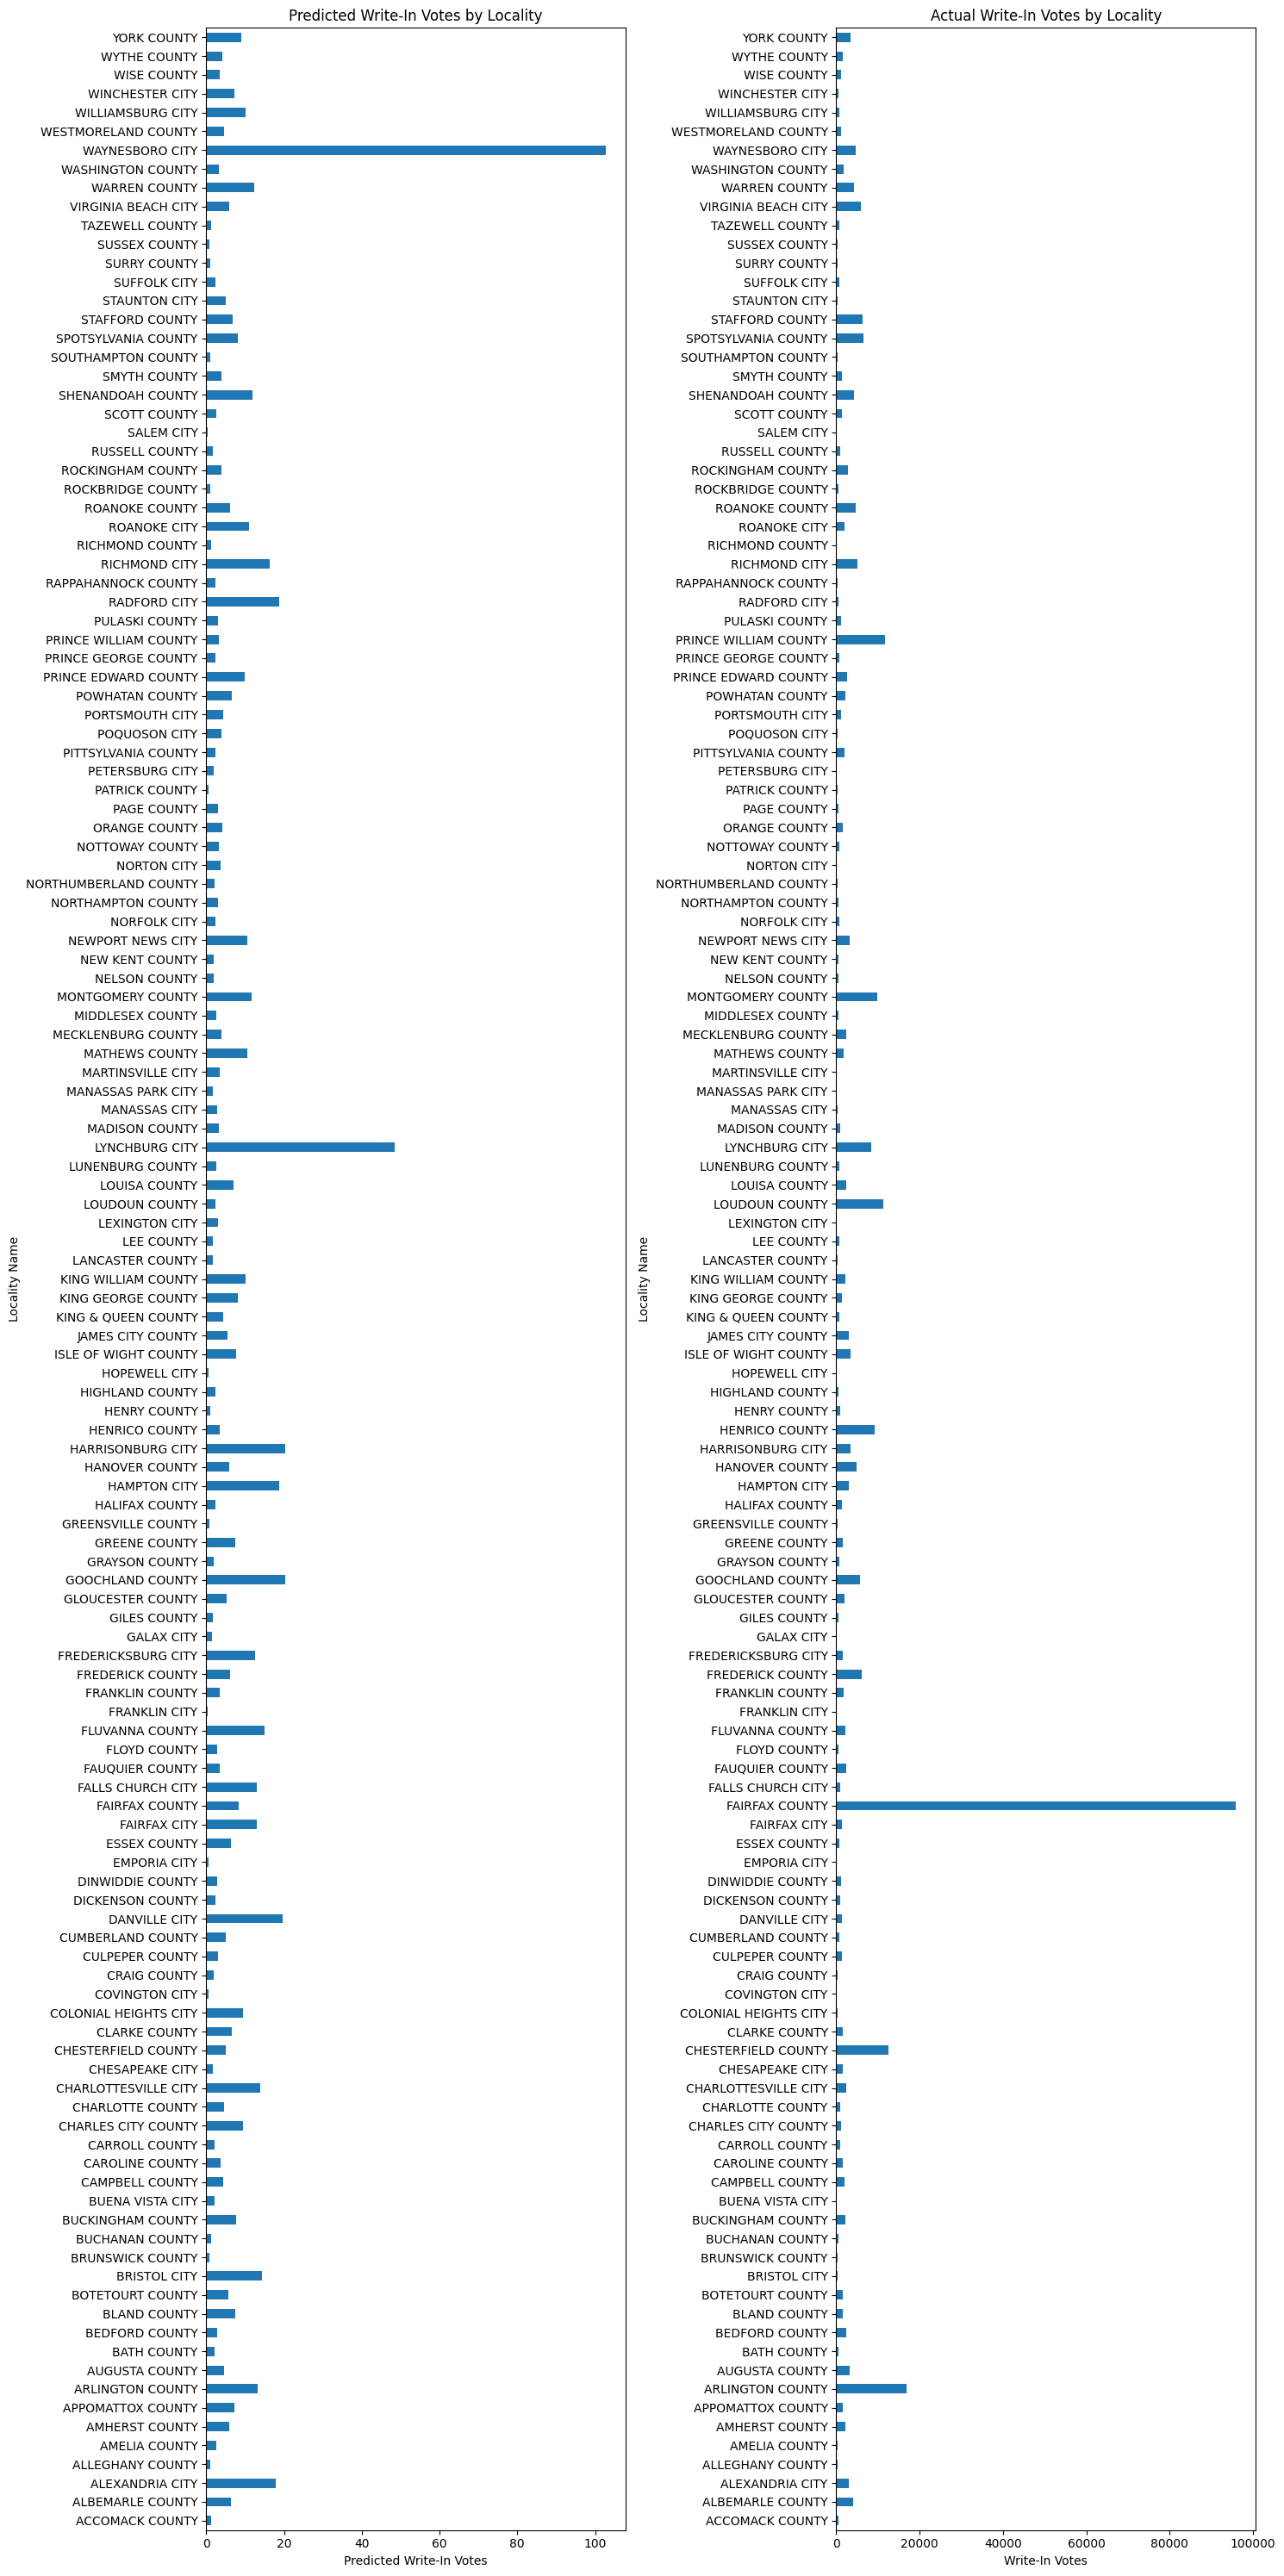

In [ ]:

import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 30))


locality_predictions.plot(kind='barh', ax=axes[0])
axes[0].set_title("Predicted Write-In Votes by Locality")
axes[0].set_ylabel("Locality Name")
axes[0].set_xlabel("Predicted Write-In Votes")


locality_writein_counts.plot(kind='barh', ax=axes[1])
axes[1].set_title("Actual Write-In Votes by Locality")
axes[1].set_ylabel("Locality Name")
axes[1].set_xlabel("Write-In Votes")


plt.tight_layout()
plt.show()

This is a huge class imbalance issue here.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
X = merged_results_winners[['Party_Float', 'LocalityCode']]
y = merged_results_winners['WriteInVote']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

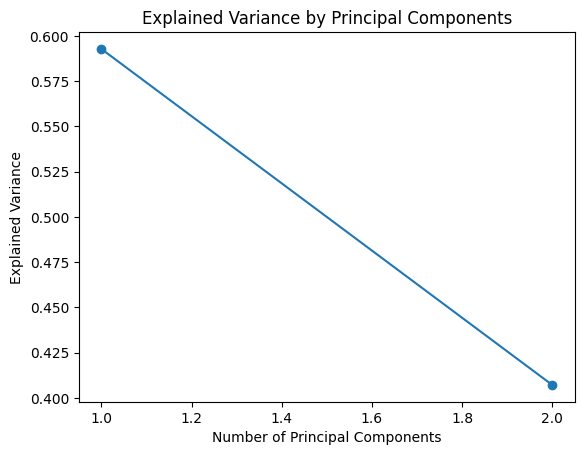

In [ ]:
explained_variance = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.show()

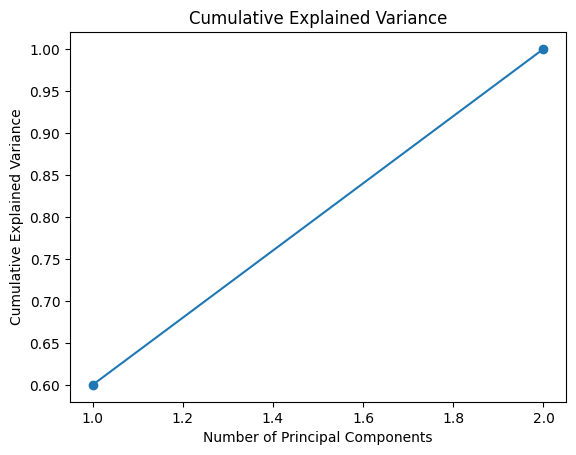

In [ ]:
explained_variance = np.array([0.600, 0.400])  #for PC1 and PC2

#calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

#plot cumulative variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 856.6816875923196
R² Score: 0.008280913407647694


**R^2 results**

Across both the standard regression and PCA-based models, the R^2 values were close to zero. These results would suggest that very little of the varaince in write-in vote counts is explained by the model, indicating a possibly weak linear relationship between the feature and target variable.   

**Significant Class Imbalance**

Write in votes represent only a very small fraction of the overall vote count in the dataset leading to significant class imbalance. This imbalance skews the model toward predicting low or zero write-in votes for almost all of the localities. This bias significantly reduces the model’s ability to capture less common but important cases of high write-in voting rates.

Extended visulazations for context

<Axes: xlabel='Count', ylabel='LocalityName'>

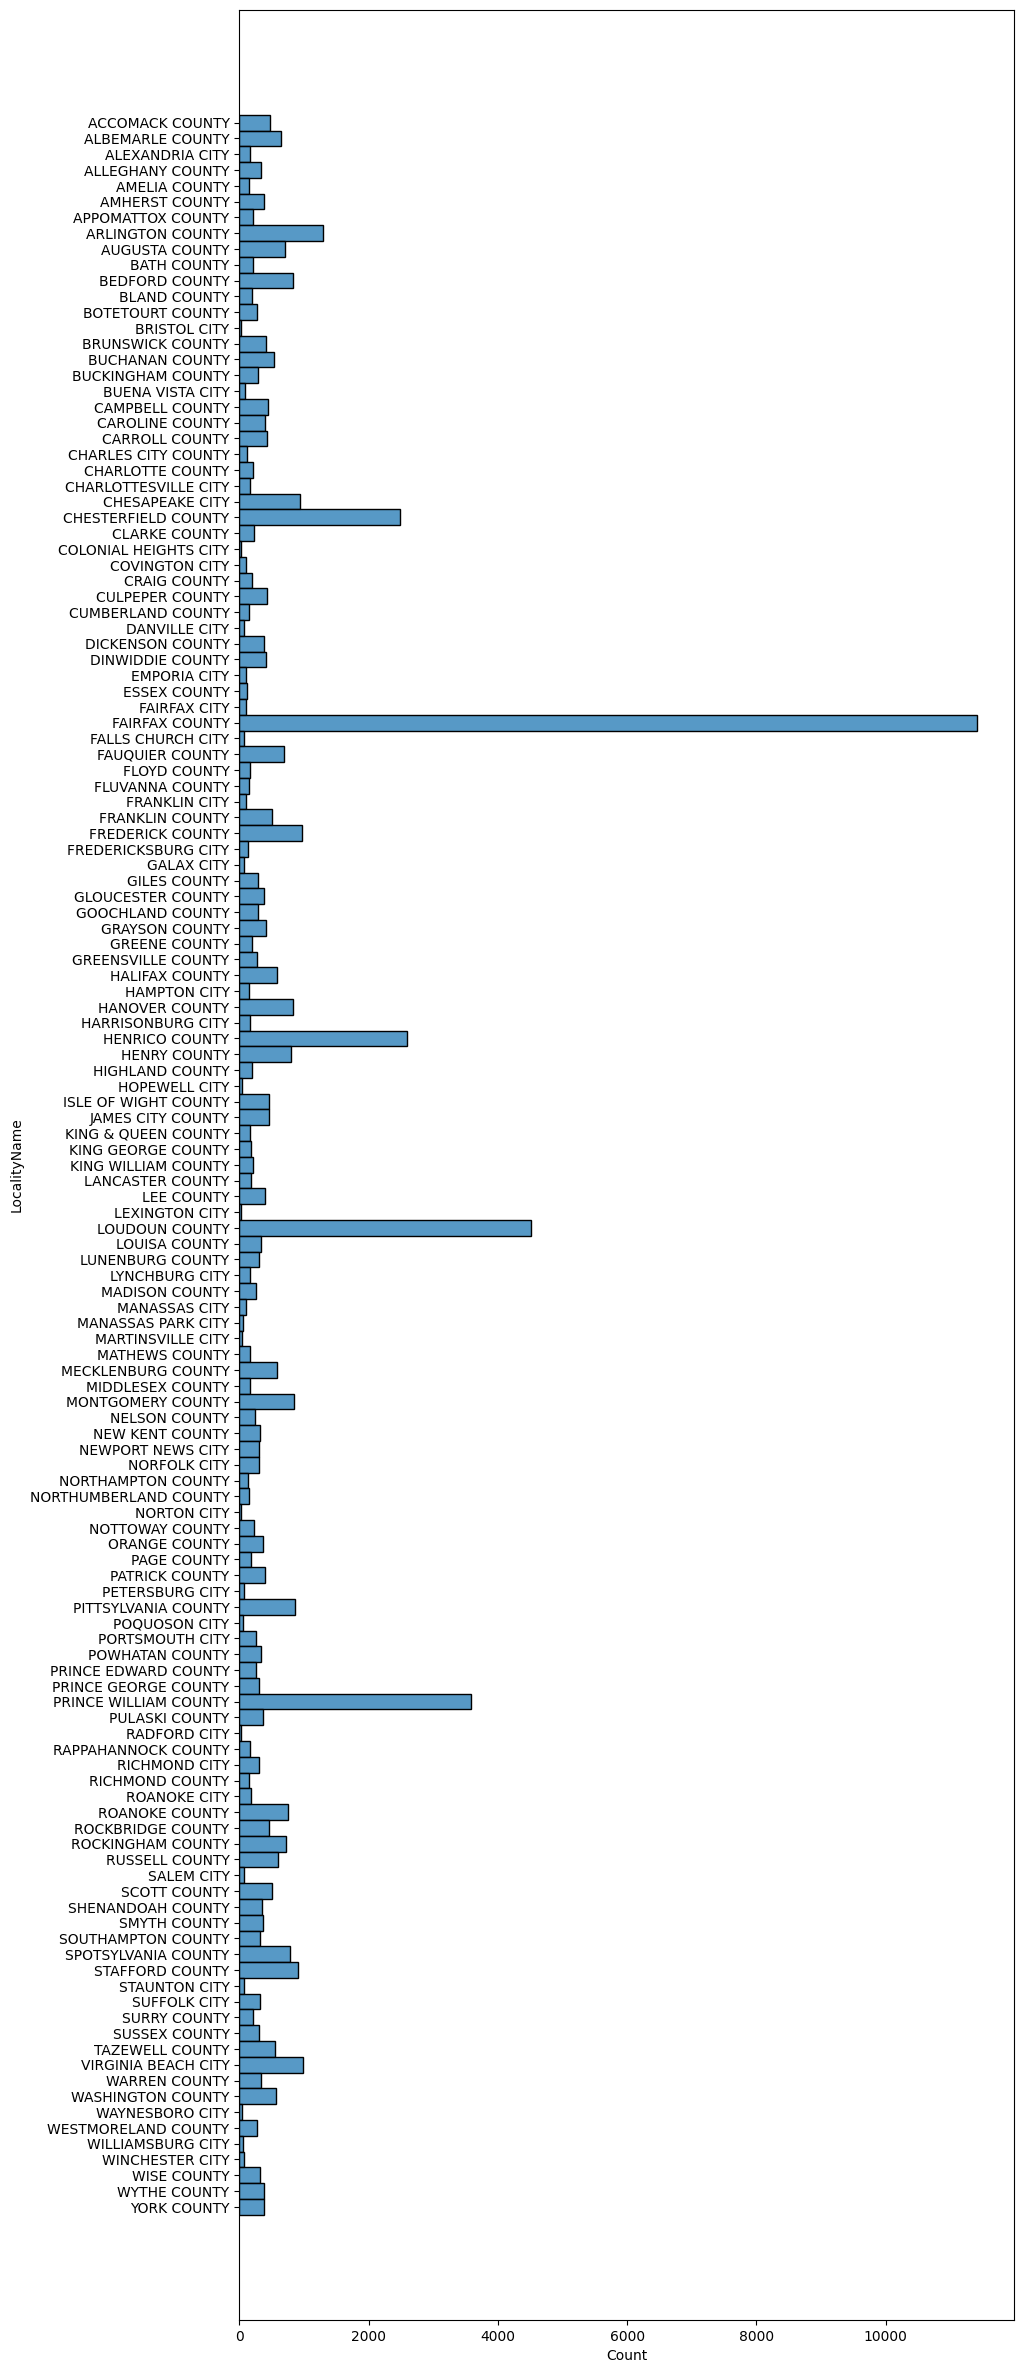

In [ ]:
plt.figure(figsize=(10,30))
sns.histplot(y=results['LocalityName'])

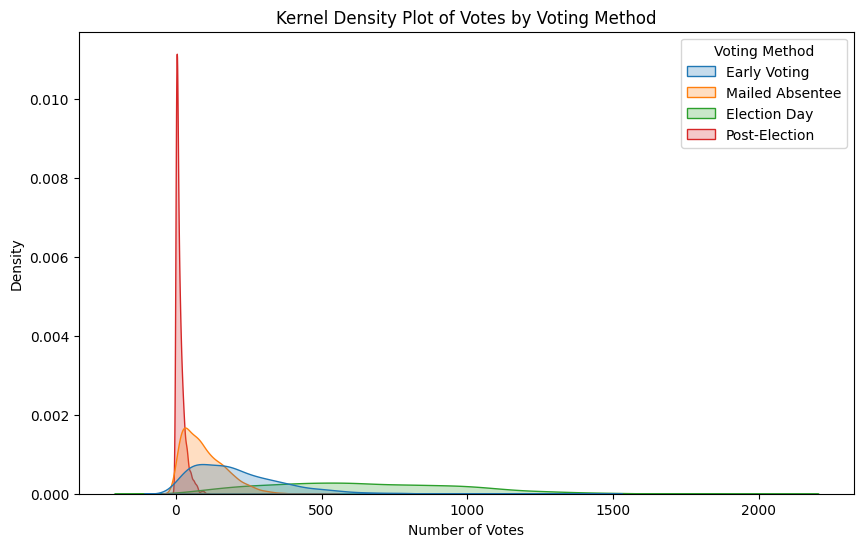

In [ ]:
turnout_long = pd.melt(turnout,
                       value_vars=['Early Voting', 'Mailed Absentee', 'Election Day', 'Post-Election'],
                       var_name='Voting Method', value_name='Votes')

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.kdeplot(data=turnout_long, x='Votes', hue='Voting Method', fill=True)
plt.title('Kernel Density Plot of Votes by Voting Method')
plt.xlabel('Number of Votes')
plt.ylabel('Density')
plt.show()

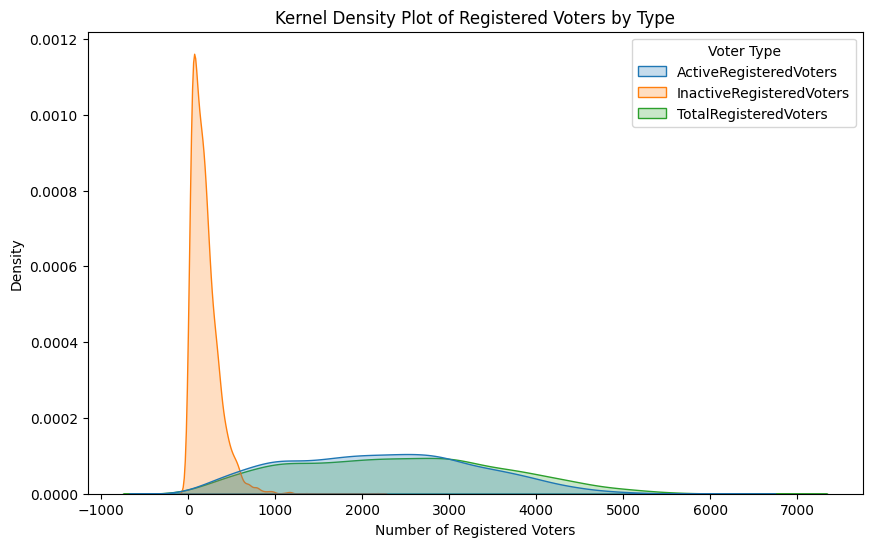

In [ ]:
turnout_long = pd.melt(
    turnout,
    value_vars=['ActiveRegisteredVoters', 'InactiveRegisteredVoters', 'TotalRegisteredVoters'],
    var_name='Voter Type',
    value_name='Count'
)


plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=turnout_long,
    x='Count',
    hue='Voter Type',
    fill=True
)
plt.title('Kernel Density Plot of Registered Voters by Type')
plt.xlabel('Number of Registered Voters')
plt.ylabel('Density')
plt.show()

In [ ]:
results['CandidateName'].value_counts()

,count
CandidateName,
WRITE IN VOTES,23220
Stacey Ann Kincaid,273
Christopher F. DeCarlo,273
Christopher J. Falcon,273
Gerarda Marie Culipher,273
...,...
E. Paige Cash,2
William Todd Jamerson,2
Kyle N. Rhodes,2
